In [303]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
data = pd.read_csv('C:\\Users\\priya sinha\\Downloads\\ICECREAM.csv')

In [304]:
data

,Temperature,No. of icecream sold
0,10,1000
1,11,1100
2,12,1150
3,13,1300
4,14,1350
5,15,1550
6,16,1600
7,17,1725
8,18,1850
9,19,1900


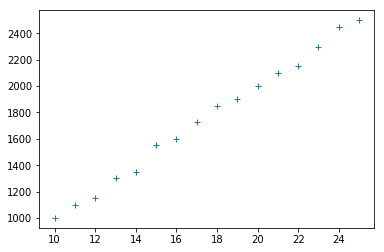

In [305]:
plt.plot(data["Temperature "],data["No. of icecream sold "], '+')

In [306]:
train_data,test_data = train_test_split(data,train_size=0.6,random_state=33)

C:\Users\priya sinha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [307]:
train_data

,Temperature,No. of icecream sold
6,16,1600
3,13,1300
10,20,2000
9,19,1900
12,22,2150
2,12,1150
8,18,1850
7,17,1725
4,14,1350


In [308]:
test_data

,Temperature,No. of icecream sold
0,10,1000
14,24,2450
1,11,1100
11,21,2100
15,25,2500
13,23,2300
5,15,1550


In [309]:
m=len(train_data["No. of icecream sold "])
learning_rate=0.0001

In [310]:
def regression(epoch):
   theta = [0.03,0.1]
   error = []
   for i in range(epoch):
       sum1=0
       predicted=theta[1]*train_data["Temperature "]+theta[0]
       for j in range(0,m):
           sum1+=(predicted.iloc[j]-train_data["No. of icecream sold "].iloc[j])**2
       J=(0.5/m)*sum1
       error.append(J)
       if error[i] < 0.000001:
            break
       else:   
            theta=gradient_descent(theta,predicted)
   return(theta,error)

In [311]:
def gradient_descent(theta,predicted):
          gradient0=0
          gradient1=0
          for k in range(0,m):
             gradient0+=(predicted.iloc[k]-train_data["No. of icecream sold "].iloc[k])
             gradient1+=(predicted.iloc[k]-train_data["No. of icecream sold "].iloc[k])*train_data["Temperature "].iloc[k]
          theta[0]=theta[0]-learning_rate*gradient0/m
          theta[1]=theta[1]-learning_rate*gradient1/m
          return(theta)

In [312]:
def sol(epoch):
    theta=regression(epoch)[0]
    test_predicted=[]
    for i in range(len(test_data["No. of icecream sold "])):
        tp=theta[1]*test_data["Temperature "].iloc[i]+theta[0]
        test_predicted.append(tp)
    test_pre=pd.DataFrame(test_predicted)
    return(test_pre)

In [313]:
sol(100)

,0
0,947.044235
1,2265.305556
2,1041.205758
3,1982.820987
4,2359.467079
5,2171.144033
6,1417.851850


In [314]:
def rms(epoch):
   test_predicted=sol(epoch)
   rms=0
   for i in range(len(test_data["No. of icecream sold "])):
       rms+=((test_predicted.iloc[i] - test_data["No. of icecream sold "].iloc[i])**2)/len(test_data["No. of icecream sold "])
   return(math.sqrt(rms))
   

In [315]:
 rms(1000)

32.29564472256668

In [316]:
def plot(epoch):
    error=regression(epoch)[1]
    print("Plot between error and number of iteration is :")
    plt.plot([i for i in range(len(error))],error)

Plot between error and number of iteration is :


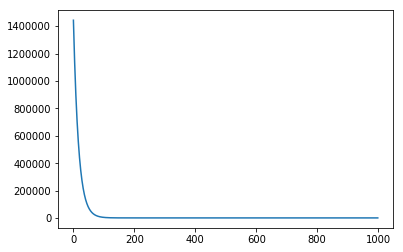

In [317]:
plot(1000)